<h2>ENSEMBLE LEARNING<h2>

<h4>İmport Library<h4>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier

import warnings
warnings.filterwarnings('ignore')

<h3>Data Sets<h3>

In [44]:
random_state=42
n_samples=1000
n_features=2
n_classes=2
noise_class=0.1
noise_moon=0.1
noise_circle=0.2
X,y=make_classification(n_samples=n_samples,
                     n_features=n_features,
                     n_classes=n_classes,
                     n_repeated=0,
                     n_redundant=0,
                     n_informative=n_features-1,
                     random_state=random_state,
                     n_clusters_per_class=1,
                     flip_y=noise_class)

<AxesSubplot:xlabel='0', ylabel='1'>

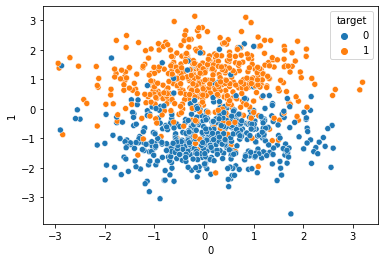

In [45]:
data=pd.DataFrame(X)
data["target"]=y
plt.figure()
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue="target",data=data)

In [46]:
data_classification=(X,y)

<AxesSubplot:xlabel='0', ylabel='1'>

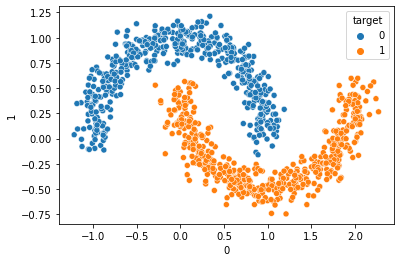

In [47]:
moon=make_moons(n_samples,noise=noise_moon,random_state=random_state)
data=pd.DataFrame(moon[0])
data["target"]=moon[1]
plt.figure()
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue="target",data=data)

<AxesSubplot:xlabel='0', ylabel='1'>

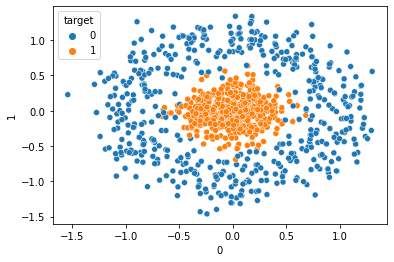

In [48]:
circle=make_circles(n_samples,factor=0.1,noise=noise_circle,random_state=random_state)

data=pd.DataFrame(circle[0])
data["target"]=circle[1]
plt.figure()
sns.scatterplot(x=data.iloc[:,0],y=data.iloc[:,1],hue="target",data=data)

In [49]:
datasets=[moon,circle]

<h3> KNN, SVM,DT<h3>

In [56]:
n_estimators=10

svc=SVC()
knn = KNeighborsClassifier(n_neighbors=15)
dt=DecisionTreeClassifier(random_state=random_state,max_depth=2)

rf=RandomForestClassifier(n_estimators=n_estimators,random_state=random_state,max_depth=2)
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=n_estimators,random_state=random_state)
v1 = VotingClassifier(estimators = [('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

names=["SVC","KNN","Decision Tree","Random Forest","Ada Boost","V1"]
classifiers=[svc,knn,dt,rf,ada,v1]

Dataset # 0
SVC: test set score: 1.0 
SVC: train set score: 0.9966666666666667 

KNN: test set score: 1.0 
KNN: train set score: 1.0 

Decision Tree: test set score: 0.9125 
Decision Tree: train set score: 0.9233333333333333 

Random Forest: test set score: 0.91 
Random Forest: train set score: 0.92 

Ada Boost: test set score: 1.0 
Ada Boost: train set score: 1.0 

V1: test set score: 1.0 
V1: train set score: 0.9966666666666667 

-------------------------------------
Dataset # 1
SVC: test set score: 0.975 
SVC: train set score: 0.99 

KNN: test set score: 0.97 
KNN: train set score: 0.9833333333333333 

Decision Tree: test set score: 0.8375 
Decision Tree: train set score: 0.8583333333333333 

Random Forest: test set score: 0.955 
Random Forest: train set score: 0.98 

Ada Boost: test set score: 0.9575 
Ada Boost: train set score: 1.0 

V1: test set score: 0.975 
V1: train set score: 0.995 

-------------------------------------


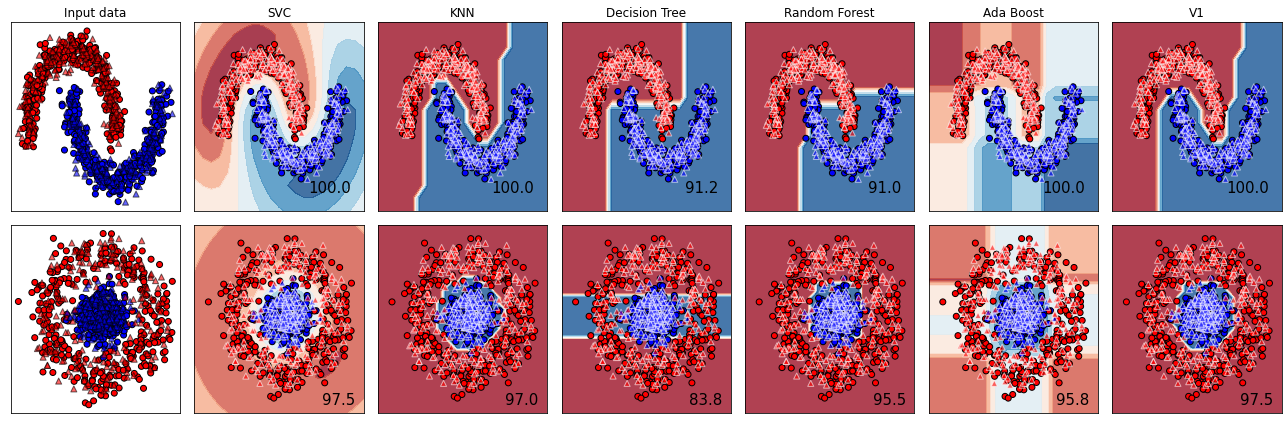

In [57]:
h=0.2
i=1
gifure=plt.figure(figsize=(18,6))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))
    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {} ".format(name, score))
        
        score_train = clf.score(X_train, y_train)  
        
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")
plt.tight_layout()
plt.show()

In [58]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names)  

Dataset # 2
SVC: test set score: 0.8875 
SVC: train set score: 0.86 

KNN: test set score: 0.875 
KNN: train set score: 0.8616666666666667 

Decision Tree: test set score: 0.895 
Decision Tree: train set score: 0.8616666666666667 

Random Forest: test set score: 0.89 
Random Forest: train set score: 0.865 

Ada Boost: test set score: 0.875 
Ada Boost: train set score: 0.87 

V1: test set score: 0.8875 
V1: train set score: 0.865 

